#CNN 구조 톺아보기

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

## ConvNet

> Convolutional Layer의 작동 방식을 알아보자!

### Conv1D

In [ ]:
# 6 timestep을 가진 128 길이의 벡터
# model_conv1.input_shape == (None, 6, 128)

input_ = tf.random.uniform((1, 6, 128))
conv1d = Conv1D(filters=32, kernel_size=3)

In [ ]:
print(input_.shape)
print(conv1d(input_).shape)

(1, 6, 128)
(1, 4, 32)


In [ ]:
# 6 timestep을 가진 128 길이의 벡터
# model_conv1.input_shape == (None, 6, 128)

model_conv1 = Sequential()
model_conv1.add(Conv1D(32, 3,
          input_shape=(6, 128)))

In [ ]:
print(model_conv1.input_shape)

(None, 6, 128)


In [ ]:
model_conv1.get_config()

{'build_input_shape': TensorShape([None, 6, 128]),
 'layers': [{'class_name': 'Conv1D',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'batch_input_shape': (None, 6, 128),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1,),
    'dtype': 'float32',
    'filters': 32,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3,),
    'name': 'conv1d_1',
    'padding': 'valid',
    'strides': (1,),
    'trainable': True,
    'use_bias': True}}],
 'name': 'sequential'}

###<font color='red'>잠깐 Quiz</font>
> Output shape를 계산해봅시다!
> 
> 힌트! [(input_size-Kernel_size + padding*2)/stride] + 1 = output_size


###<font color='red'>Answer</font>

> 정답을 고민해보세요!



In [2]:
##### ANSWER #####
print((6 - 3 + 0*2)/1 + 1)
##################

4.0


In [ ]:
print(model_conv1.get_weights()) # same as model_conv1.variables
print(model_conv1.get_weights()[0].shape) # Weights
print(model_conv1.get_weights()[1].shape) # Bias

[array([[[-0.01599193,  0.05381905, -0.02320976, ..., -0.07067515,
         -0.01354299,  0.08587489],
        [ 0.03167315,  0.01042303, -0.01683529, ..., -0.002375  ,
         -0.08605564,  0.04146285],
        [-0.10404863,  0.03703418, -0.06552026, ...,  0.08509786,
         -0.08869285, -0.078366  ],
        ...,
        [ 0.06291111, -0.09806276,  0.08916312, ..., -0.05399238,
          0.06309375,  0.05425601],
        [-0.03378239,  0.02102774, -0.02824382, ...,  0.09492572,
          0.0629641 , -0.06016117],
        [ 0.06396176,  0.03594583,  0.02601629, ..., -0.03573936,
         -0.0220455 , -0.08089282]],

       [[ 0.11054963, -0.02475128,  0.06233926, ..., -0.03880133,
         -0.08037581, -0.08980468],
        [-0.02282466, -0.01832297, -0.04180531, ..., -0.01850953,
         -0.09419391, -0.08784479],
        [ 0.06740011, -0.00551278,  0.03767808, ...,  0.01499203,
         -0.03644044, -0.01747205],
        ...,
        [-0.05029258, -0.09375816,  0.07421547, ..., 

In [ ]:
model_conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4, 32)             12320     
Total params: 12,320
Trainable params: 12,320
Non-trainable params: 0
_________________________________________________________________


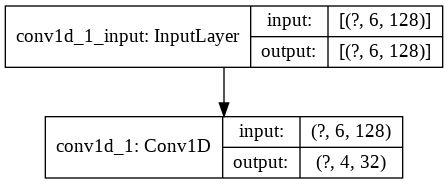

In [ ]:
tf.keras.utils.plot_model(model_conv1, show_shapes=True)

In [ ]:
conv1 = Conv1D(32, 3 ,input_shape=(6, 128))

In [ ]:
#input_ = np.random.random((1, 6, 128))
input_ = tf.random.uniform((1, 6, 128))

In [ ]:
print(input_.shape)
print(conv1(input_).shape)

(1, 6, 128)
(1, 4, 32)


###Conv2D

In [ ]:
model_conv2 = Sequential()
model_conv2.add(Conv2D(10, kernel_size=3, input_shape=(32, 32, 1))) # Image Size

In [ ]:
print(model_conv2.input_shape)
print(model_conv2.get_weights()[0].shape)
print(model_conv2.get_weights()[1].shape)

(None, 32, 32, 1)
(3, 3, 1, 10)
(10,)


> (32-3)/1 + 1 = 30

In [ ]:
print(model_conv2.output_shape)

(None, 30, 30, 10)


In [ ]:
model_conv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 10)        100       
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


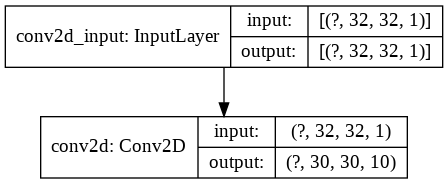

In [ ]:
tf.keras.utils.plot_model(model_conv2, show_shapes=True)


### <font color='red'>MISSION 1</font>
> input의 shape가 "[None, 32, 32, 1]"일 때
> output의 shape가 '[None, 15, 15, 10]'가 되도록 Conv Layer를 만들어봅시다.  
> 이 때 사용해야 할 kernel size는 3 이다.

### <font color='red'>ANSWER 1</font>

In [ ]:
model_mission1 = Sequential()

model_mission1.add(
    #### ANSWER ####
    Conv2D(10, 3, 2,input_shape=(32, 32, 1))
    ################
)


> (32-Kernel_size + padding*2)/stride + 1 = 15

In [ ]:
print(model_mission1.output_shape)

(None, 15, 15, 10)


##MaxPool

> Maxpool의 활용을 이해해봅시다!

In [ ]:
model_mp1 = Sequential()
model_mp1.add(MaxPooling2D(pool_size=(3, 3), input_shape=(15, 15, 10)))

In [ ]:
print(model_mp1.input_shape)
print(model_mp1.output_shape)

(None, 15, 15, 10)
(None, 5, 5, 10)


In [ ]:
model_mp1 = Sequential()
model_mp1.add(MaxPooling2D(pool_size=(3, 3), input_shape=(30, 30, 10)))

In [ ]:
print(model_mp1.input_shape)
print(model_mp1.output_shape)

(None, 30, 30, 10)
(None, 10, 10, 10)


In [ ]:
model_mp2 = Sequential()
model_mp2.add(MaxPooling2D(pool_size=(3, 3), strides=2, input_shape=(30, 30, 10)))

In [ ]:
print(model_mp2.input_shape)
print(model_mp2.output_shape)

(None, 30, 30, 10)
(None, 14, 14, 10)


In [ ]:
model_mp3 = Sequential()
model_mp3.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding="same", input_shape=(30, 30, 10)))

In [ ]:
print(model_mp3.input_shape)
print(model_mp3.output_shape)

(None, 30, 30, 10)
(None, 15, 15, 10)


In [ ]:
#input__ = np.random.random((1, 30, 30, 10))
input__ = tf.random.uniform((1, 30, 30, 10))

In [ ]:
print(input__.shape)

(1, 30, 30, 10)


In [ ]:
print(input__[0, 0:3, 0:3, 0])

tf.Tensor(
[[0.4982766  0.9941895  0.5503466 ]
 [0.75453365 0.35895467 0.1576755 ]
 [0.29156554 0.96501887 0.4925003 ]], shape=(3, 3), dtype=float32)


In [ ]:
print(np.max(input__[0, 0:3, 0:3, 0]))

0.9941895


In [ ]:
print(model_mp3(input__)[0, 0, 0, 0])

tf.Tensor(0.9941895, shape=(), dtype=float32)


In [ ]:
model_ap = Sequential()
model_ap.add(AveragePooling2D(pool_size=(3, 3), strides=2, padding="same"))

In [ ]:
print(np.average(input__[0, 0:3, 0:3, 0]))

0.56256235


In [ ]:
print(model_ap(input__)[0, 0, 0, 0])

tf.Tensor(0.56256235, shape=(), dtype=float32)


##Activations

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
def plotting(title, in_data, out_data):
    plt.plot(np.sort(in_data), np.sort(out_data))
    plt.xlabel('indata')
    plt.ylabel('outdata')
    plt.title(title)

In [ ]:
sigmoid = tf.keras.layers.Activation("sigmoid")
relu = tf.keras.layers.Activation("relu")
leaky_relu = tf.keras.layers.LeakyReLU() #가능한 또 다른 방법

In [ ]:
sigmoid.get_config()

{'activation': 'sigmoid',
 'dtype': 'float32',
 'name': 'activation',
 'trainable': True}

In [ ]:
data = (np.random.random((100)).astype('float32')-.5)*4 # -2 to 2

In [ ]:
data

array([-5.04774928e-01, -1.37669921e+00, -1.17750931e+00,  1.64019251e+00,
       -1.47381353e+00, -5.97802997e-01,  1.40422058e+00, -8.47951412e-01,
        1.07153416e-01, -1.36364532e+00,  9.83869076e-01, -2.77531385e-01,
        8.40650082e-01, -5.26802182e-01,  1.41550183e+00, -1.69213414e-01,
       -2.25966454e-01, -9.84270692e-01,  4.42854643e-01, -1.09742212e+00,
       -1.67874503e+00,  3.89232635e-01,  1.49127579e+00,  9.23066139e-02,
        8.02087784e-03,  3.00932407e-01,  1.21793079e+00,  1.06019402e+00,
        1.23146749e+00,  1.80222964e+00,  3.95779610e-02, -1.05710030e-02,
       -1.18781567e-01, -6.14938855e-01, -1.73272550e+00, -1.54605961e+00,
       -6.40422106e-01,  5.88267565e-01,  1.31711960e-02,  6.56610012e-01,
        2.90230036e-01,  2.86073446e-01, -5.13738036e-01,  6.62885189e-01,
       -3.33332181e-01, -6.55177712e-01,  4.59870815e-01,  1.23869181e-01,
        1.70013881e+00,  3.66304636e-01,  1.45031261e+00, -1.87714219e-01,
       -1.04976273e+00,  

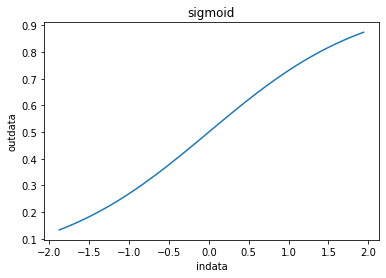

In [ ]:
plotting('sigmoid', data, sigmoid(data))

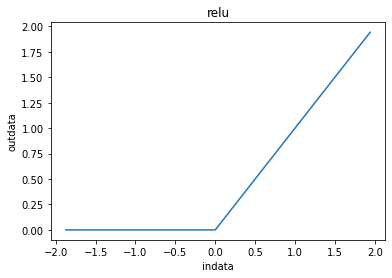

In [ ]:
plotting('relu', data, relu(data))

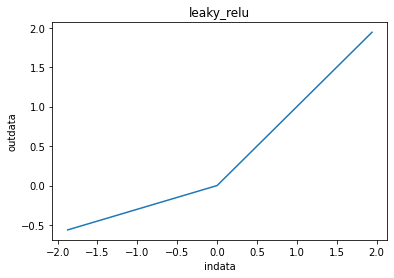

In [ ]:
plotting('leaky_relu', data, leaky_relu(data))

##BatchNorm 2d

In [ ]:
model_bn = Sequential()
model_bn.add(BatchNormalization(input_shape=(40, 40, 100))

In [ ]:
model_bn.get_config()

{'build_input_shape': TensorShape([None, 40, 40, 100]),
 'layers': [{'class_name': 'BatchNormalization',
   'config': {'axis': ListWrapper([3]),
    'batch_input_shape': (None, 40, 40, 100),
    'beta_constraint': None,
    'beta_initializer': {'class_name': 'Zeros', 'config': {}},
    'beta_regularizer': None,
    'center': True,
    'dtype': 'float32',
    'epsilon': 0.001,
    'gamma_constraint': None,
    'gamma_initializer': {'class_name': 'Ones', 'config': {}},
    'gamma_regularizer': None,
    'momentum': 0.99,
    'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}},
    'moving_variance_initializer': {'class_name': 'Ones', 'config': {}},
    'name': 'batch_normalization',
    'scale': True,
    'trainable': False}}],
 'name': 'sequential_8'}

In [ ]:
model_bn.get_weights()

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

## Loss Function

In [ ]:
BCEloss = tf.keras.losses.BinaryCrossentropy(from_logits=True )

In [ ]:
input____ = tf.random.uniform((3, 5))

In [ ]:
target = tf.random.uniform((3, 5))

In [ ]:
output____ = BCEloss(target, input____)

In [ ]:
print(output____)

tf.Tensor(0.7212451, shape=(), dtype=float32)


In [ ]:
print(input____)
print(target)

tf.Tensor(
[[0.6758113  0.09227669 0.13315678 0.70475614 0.38178766]
 [0.7308973  0.56719446 0.0499537  0.43402314 0.45963275]
 [0.8241242  0.5601051  0.0200299  0.3300599  0.51762104]], shape=(3, 5), dtype=float32)
tf.Tensor(
[[0.42852962 0.8633368  0.5351509  0.43684494 0.7418622 ]
 [0.14599991 0.98525953 0.37183034 0.88241184 0.41244745]
 [0.09955943 0.8803451  0.3188249  0.3590753  0.56428134]], shape=(3, 5), dtype=float32)


##Build Network

> TF 2.0은 Sequential()과 모델 서브클래싱을 사용하여 다양한 형태로 모델을 쌓을 수 있다.

In [ ]:
# CIFAR10 : 3 x 32 x 32

final_model1 = Sequential()
final_model1.add(Conv2D(64, kernel_size=3, strides=2,input_shape=(32, 32, 3)))
final_model1.add(BatchNormalization())
final_model1.add(Activation('relu'))
final_model1.add(MaxPooling2D(pool_size=(2,2)))
final_model1.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
final_model1.add(BatchNormalization())
final_model1.add(Activation('relu'))
final_model1.add(MaxPooling2D(pool_size=(2,2)))

#Data Output size : 2 x 2 x 128

In [ ]:
final_model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
activation_3 (Activation)    (None, 4, 4, 128)        

In [ ]:
# CIFAR10 : 32 x 32 x 3

def make_finalmodel():
  final_model = Sequential()
  final_model.add(Conv2D(64, kernel_size=3, strides=2,input_shape=(32, 32, 3)))
  final_model.add(BatchNormalization())
  final_model.add(Activation('relu'))
  final_model.add(MaxPooling2D(pool_size=(2,2)))
  final_model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
  final_model.add(BatchNormalization())
  final_model.add(Activation('relu'))
  final_model.add(MaxPooling2D(pool_size=(2,2)))
  return final_model

final_model2 = make_finalmodel()

#Data Output size : 2 x 2 x 128

In [ ]:
final_model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15, 15, 64)        1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 15, 15, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
activation_5 (Activation)    (None, 4, 4, 128)       

In [ ]:
# CIFAR10 : 32 x 32 x 3

final_model3 = Sequential([
  Conv2D(64, kernel_size=3, strides=2,input_shape=(32, 32, 3)),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(128, kernel_size=3, strides=2, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=(2,2))
])

#Data Output size : 2 x 2 x 128

In [ ]:
final_model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 15, 15, 64)        1792      
_________________________________________________________________
batch_normalization_5 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 15, 15, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_6 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
activation_7 (Activation)    (None, 4, 4, 128)       

In [ ]:
# CIFAR10 : 32 x 32 x 3

class MyModel_conv(Model):
  def __init__(self):
    super(MyModel_conv, self).__init__()
    self.conv1 = Conv2D(64, kernel_size=3, strides=2)
    self.bn1 = BatchNormalization()
    self.relu1 = Activation('relu')
    self.mp1 = MaxPooling2D(pool_size=(2,2))
    self.conv2 = Conv2D(128, kernel_size=3, strides=2,padding='same')
    self.bn2 = BatchNormalization()
    self.relu2 = Activation('relu')
    self.mp2 = MaxPooling2D(pool_size=(2,2))

  def call(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu1(x)
    x = self.mp1(x)
    x = self.conv2(x)
    x = self.bn2(x)
    x = self.relu2(x)
    x = self.mp2(x)
    return x

final_model4 = MyModel_conv()
final_model4.build(input_shape=(1, 32, 32, 3))

#Data Output size : 2 x 2 x 128

In [ ]:
final_model4.summary()

Model: "my_model_conv"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            multiple                  1792      
_________________________________________________________________
batch_normalization_7 (Batch multiple                  256       
_________________________________________________________________
activation_8 (Activation)    multiple                  0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_9 (Conv2D)            multiple                  73856     
_________________________________________________________________
batch_normalization_8 (Batch multiple                  512       
_________________________________________________________________
activation_9 (Activation)    multiple                


### <font color='red'>MISSION 2</font>
> input의 shape가 cifar 10과 같이 "[None, 32, 32, 3]"일 때
> 다음 사항을 만족하도록 모델을 쌓아봅시다.



> Mission2의 조건


각 Conv2D의 뒤에는 BatchNorm과 relu activation이 순서대로 붙습니다.

마지막 activation은 sigmoid 입니다.


* Conv2D (32, 32, 3) -> (15, 15, 64)
* Conv2D (15, 15, 64) -> (13, 13, 128)
* Conv2D (13, 13, 128) -> (11, 11, 128)
* MaxPool2D (11, 11, 128) -> (5, 5, 128)
* Conv2D (5, 5, 128) -> (3, 3, 32)






### <font color='red'>ANSWER 2</font>

In [ ]:
# CIFAR10 : 32 x 32 x 3

model_mission2 = Sequential([
  #### ANSWER ####
  Conv2D(64, 3, 2, input_shape=(32, 32, 3)),
  BatchNormalization(),
  Activation('relu'),

  Conv2D(128, 3),
  BatchNormalization(),
  Activation('relu'),

  Conv2D(128, 3),
  BatchNormalization(),
  Activation('relu'),

  MaxPooling2D(2),

  Conv2D(32, 3),
  BatchNormalization(),
  Activation('relu')
  #################
])

#Data Output size : 2 x 2 x 128
model_mission2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 15, 15, 64)        1792      
_________________________________________________________________
batch_normalization_9 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_10 (Batc (None, 13, 13, 128)       512       
_________________________________________________________________
activation_11 (Activation)   (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 128)     

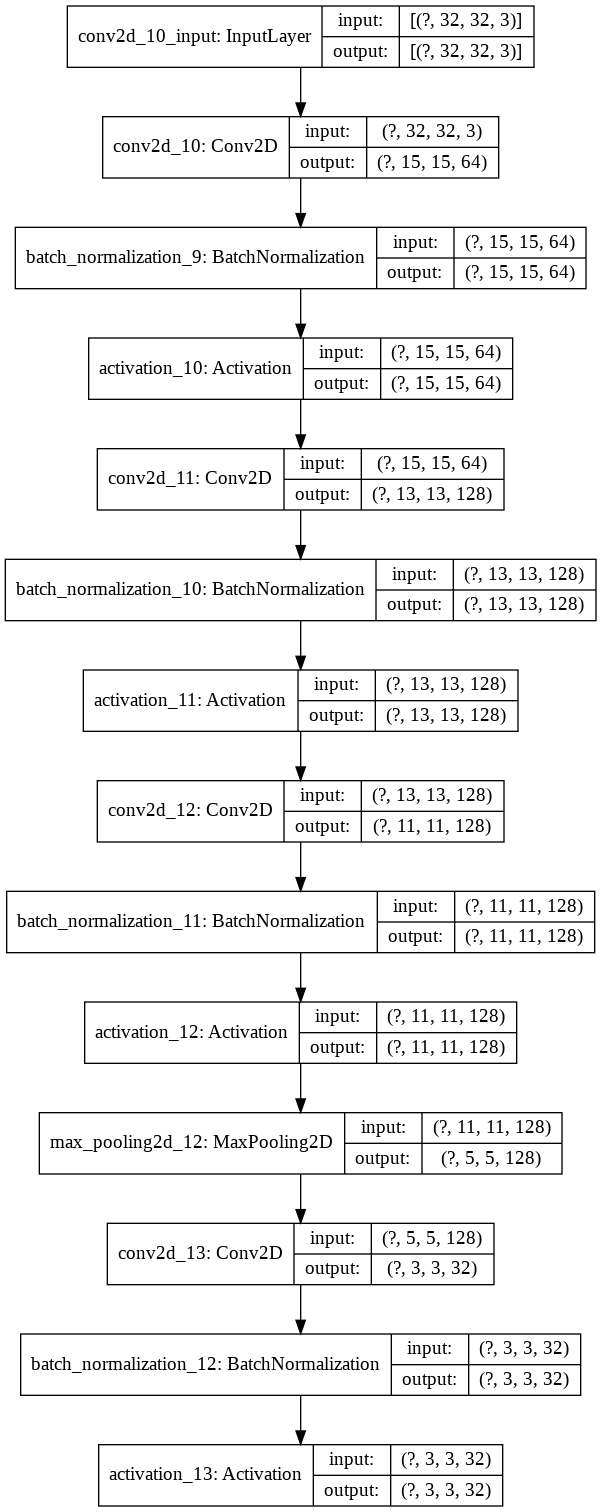

In [ ]:
tf.keras.utils.plot_model(model_mission2, show_shapes=True)